**Illustrate risk-targeted hazard level**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.interpolate import interp1d

In [2]:
# Define colors
colorspec = [
    [56/255, 95/255, 150/255],
    [207/255, 89/255, 33/255],
    [158/255, 184/255, 219/255],
    [231/255, 184/255, 0/255],
    [128/255, 0/255, 0/255] ]

In [3]:
# Load previous hazard curve
x = np.logspace(np.log10(0.001), np.log10(2), 100)  # IM values to consider

In [4]:
# Mean hazard from Chapter 6 simplified logic tree
lambdaMean = np.array([0.0251694954594308, 0.0243005973346253, 0.0234365472558623, 0.0225792462468511, 0.0217305158448367,
                       0.0208920837822666, 0.0200655715142511, 0.0192524837495085, 0.0184542000865126, 0.0176719688005284,
                       0.0169069027730509, 0.0161599775046000, 0.0154320311063565, 0.0147237661269249, 0.0140357530384293,
                       0.0133684351816874, 0.0127221349535275, 0.0120970610102702, 0.0114933162595579, 0.0109109064174252,
                       0.0103497489179256, 0.00980968197780037, 0.00929047363756543, 0.00879183062195665, 0.00831340688589137,
                       0.00785481173602961, 0.00741561744179956, 0.00699536627266170, 0.00659357691982798, 0.00620975028017252,
                       0.00584337459734840, 0.00549392996997187, 0.00516089224907525, 0.00484373635688936, 0.00454193906650127,
                       0.00425498128721521, 0.00398234990373885, 0.00372353921886845, 0.00347805204941328, 0.00324540052394014,
                       0.00302510662878499, 0.00281670254590154, 0.00261973082270939, 0.00243374441035183, 0.00225830660283430,
                       0.00209299090552312, 0.00193738085754465, 0.00179106982882404, 0.00165366080890037, 0.00152476620129790,
                       0.00140400763414932, 0.00129101579497441, 0.00118543029502282, 0.00108689956639214, 0.000995080793225799,
                       0.000909639876668399, 0.000830251431896055, 0.000756598814428752, 0.000688374172055584, 0.000625278518042679,
                       0.000567021820830418, 0.000513323105142555, 0.000463910559307276, 0.000418521643610899, 0.000376903194651442,
                       0.000338811520914285, 0.000304012485139082, 0.000272281569469359, 0.000243403919858480, 0.000217174366732617,
                       0.000193397419468867, 0.000171887232821039, 0.000152467544004570, 0.000134971579723542, 0.000119241932976582,
                       0.000105130410005028, 9.24978482376873e-05, 8.12139065351012e-05, 7.11568294363794e-05, 6.22131874592354e-05,
                       5.42775957953396e-05, 4.72524139769621e-05, 4.10474292661717e-05, 3.55795266353024e-05, 3.07723482686310e-05,
                       2.65559455227739e-05, 2.28664262410104e-05, 1.96456002286791e-05, 1.68406255681954e-05, 1.44036582884222e-05,
                       1.22915077099856e-05, 1.04652995717140e-05, 8.89014880956513e-06, 7.53484361431181e-06, 6.37154214337735e-06,
                       5.37548301094735e-06, 4.52471043365022e-06, 3.79981467097529e-06, 3.18368817390031e-06, 2.66129764494389e-06])
lambdaIM = lambdaMean  # Pick a hazard curve to use


In [5]:
dLambda = abs(np.append(np.diff(lambdaIM), 0))  # Derivative of hazard curve

In [6]:
# Find risk-targeted fragility
lambdaTarg = 2e-4  # Target collapse risk
pTarg = 1 - np.exp(-lambdaTarg * 50)  # Collapse probability in 50 years

betaIM = 0.6  # Assumed fragility beta
thetaIM = np.arange(0.1, 0.61, 0.01)
failRate = np.zeros_like(thetaIM)

In [7]:
for i in range(len(thetaIM)):
    pFail = norm.cdf(np.log(x), np.log(thetaIM[i]), betaIM)
    failRate[i] = np.sum(pFail * dLambda)

# Create the interpolation function
interpolator = interp1d(failRate, thetaIM, fill_value="extrapolate")
thetaTarget = interpolator(lambdaTarg)  # Find risk-targeted theta

In [8]:
thetaIM

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ])

(0.0, 0.0007)

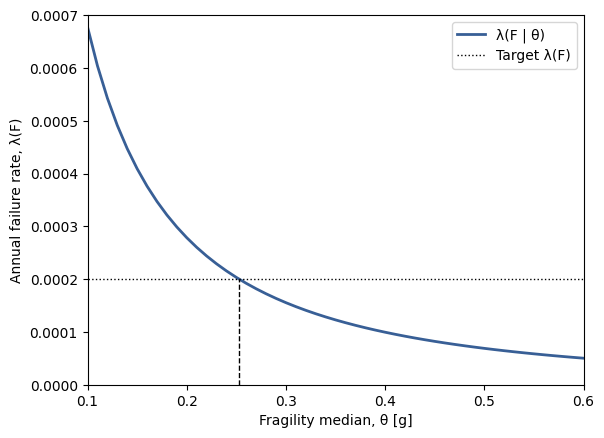

In [9]:
plt.figure()
plt.plot(thetaIM, failRate, '-', linewidth=2, color=colorspec[0])
plt.plot(thetaIM, lambdaTarg * np.ones_like(thetaIM), ':k', linewidth=1)
plt.plot(thetaTarget * np.ones(2), [0, lambdaTarg], '--k', linewidth=1)
plt.legend(['λ(F | θ)', 'Target λ(F)'])
plt.xlabel('Fragility median, θ [g]')
plt.ylabel('Annual failure rate, λ(F)')
plt.xlim([0.1,0.6])
plt.ylim([0,0.0007])

In [10]:
# Alternate beta
betaIM2 = 0.7  # Assumed fragility beta
failRate2 = np.zeros_like(thetaIM)
for i in range(len(thetaIM)):
    pFail = norm.cdf(np.log(x), np.log(thetaIM[i]), betaIM2)
    failRate2[i] = np.sum(pFail * dLambda)

# Create the interpolation function
interpolator2 = interp1d(failRate2, thetaIM, fill_value="extrapolate")
thetaTarget2 = interpolator2(lambdaTarg)  # Find risk-targeted theta

In [11]:
# Another alternate beta
betaIM3 = 0.8  # Assumed fragility beta
failRate3 = np.zeros_like(thetaIM)
for i in range(len(thetaIM)):
    pFail = norm.cdf(np.log(x), np.log(thetaIM[i]), betaIM3)
    failRate3[i] = np.sum(pFail * dLambda)

# Create the interpolation function
interpolator3 = interp1d(failRate3, thetaIM, fill_value="extrapolate")
thetaTarget3 = interpolator3(lambdaTarg)  # Find risk-targeted theta

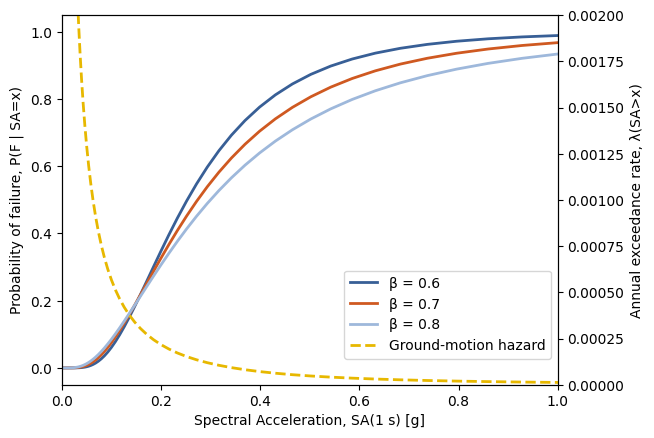

In [12]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, norm.cdf(np.log(x), np.log(thetaTarget), betaIM), '-', linewidth=2, color=colorspec[0])
ax1.plot(x, norm.cdf(np.log(x), np.log(thetaTarget2), betaIM2), '-', linewidth=2, color=colorspec[1])
ax1.plot(x, norm.cdf(np.log(x), np.log(thetaTarget3), betaIM3), '-', linewidth=2, color=colorspec[2])
ax1.set_ylabel('Probability of failure, P(F | SA=x)')
ax1.set_xlabel('Spectral Acceleration, SA(1 s) [g]')
ax2.plot(x, lambdaIM, '--', linewidth=2, color=colorspec[3])
ax2.set_ylim([0, 0.002])
ax2.set_ylabel('Annual exceedance rate, λ(SA>x)')
fig.legend(['β = ' + str(betaIM), 'β = ' + str(betaIM2), 'β = ' + str(betaIM3), 'Ground-motion hazard'], loc='lower right', bbox_to_anchor=(0.9, 0.15))
ax1.set_xlim([0, 1])
plt.show()